## This is Soccer dataset from Kaggle,here i am using some ML & DL algorithms to predict the home team result based on the data provided, the data contains various attributes like  	match_date 	home_country,	away_country,	home_score,	away_score,	match_type, 	match_city,	match_country, home_team_result. Here home_team_result will be our target value.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
import statistics

# SOCCER DATA SET

In [2]:
match=pd.read_csv("E:/Drive E/Excel datasets/projects dataset csv/soccer_international_history_weka_dataset.csv")
match.head(20)

,match_date,home_country,away_country,home_score,away_score,match_type,match_city,match_country,home_team_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Win
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,Win
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,Loss
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,Loss
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,Win
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,Win


# 1. DATA INFORMATION

### Getting statistical inference

In [3]:
match.describe()

,home_score,away_score
count,38685.000000,38685.000000
mean,1.729146,1.194752
std,1.722412,1.397302
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,22.000000


### Finding the missing values

In [4]:
print( 'Number of missing values in each columns')
for column in match.columns:
    print(column +":" + str(match[column].isnull().sum()))

Number of missing values in each columns
match_date:0
home_country:0
away_country:0
home_score:0
away_score:0
match_type:0
match_city:0
match_country:0
home_team_result:0


# FINDING UNIQUE FEATURES

In [5]:
#lets see the unique values of home_country column
match['home_country'].unique()
n = len(pd.unique(match['home_country']))
print("No.of.unique values :", n)


No.of.unique values : 243


In [6]:
print("No of unique values :",len(pd.unique(match['home_country'])))
print("No of unique values :",len(pd.unique(match['away_country'])))
print("No of unique values :",len(pd.unique(match['home_score'])))
print("No of unique values :",len(pd.unique(match['away_score'])))
print("No of unique values :",len(pd.unique(match['match_type'])))
print("No of unique values :",len(pd.unique(match['match_city'])))
print("No of unique values :",len(pd.unique(match['match_country'])))
print("No of unique values :",len(pd.unique(match['home_team_result'])))



No of unique values : 243
No of unique values : 243
No of unique values : 23
No of unique values : 23
No of unique values : 95
No of unique values : 1795
No of unique values : 268
No of unique values : 3


# CONVERTING OBJECT DATATYPE INTO NUMARICAL DATATYPE
## using LabelEncoder()

In [7]:
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()


In [8]:
match['match_date'] = le.fit_transform(match['match_date'])
match['home_country'] = le.fit_transform(match['home_country'])
match['away_country'] = le.fit_transform(match['away_country'])
match['match_type'] = le.fit_transform(match['match_type'])
match['match_city'] = le.fit_transform(match['match_city'])
match['match_country'] = le.fit_transform(match['match_country'])
match['home_team_result'] = le.fit_transform(match['home_team_result'])
match

,match_date,home_country,away_country,home_score,away_score,match_type,match_city,match_country,home_team_result
0,0,184,64,0,0,47,559,201,0
1,1,65,180,4,2,47,890,68,2
2,2,184,64,2,1,47,559,201,2
3,3,65,180,2,2,47,890,68,0
4,4,184,64,3,0,47,559,201,2
...,...,...,...,...,...,...,...,...,...
38680,14738,19,105,1,0,47,250,19,2
38681,14738,79,72,2,2,47,370,85,0
38682,14738,218,90,1,1,47,393,236,0
38683,14739,11,92,3,1,46,1528,10,2


# Visualization

(6.0, 0)

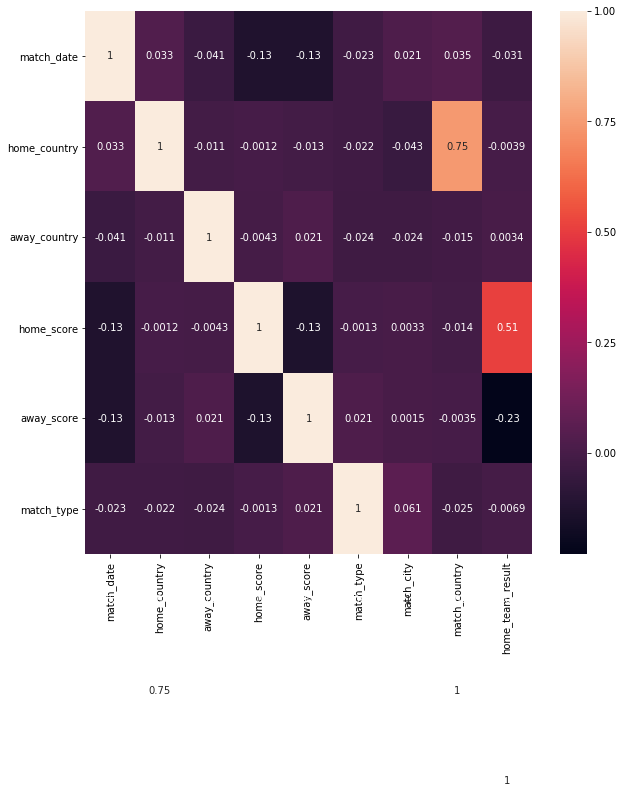

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
ax=sns.heatmap(data=match.corr().round(5),annot=True);
ax.set_ylim([6.0, 0])

C:\Users\Abhishek\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Abhishek\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


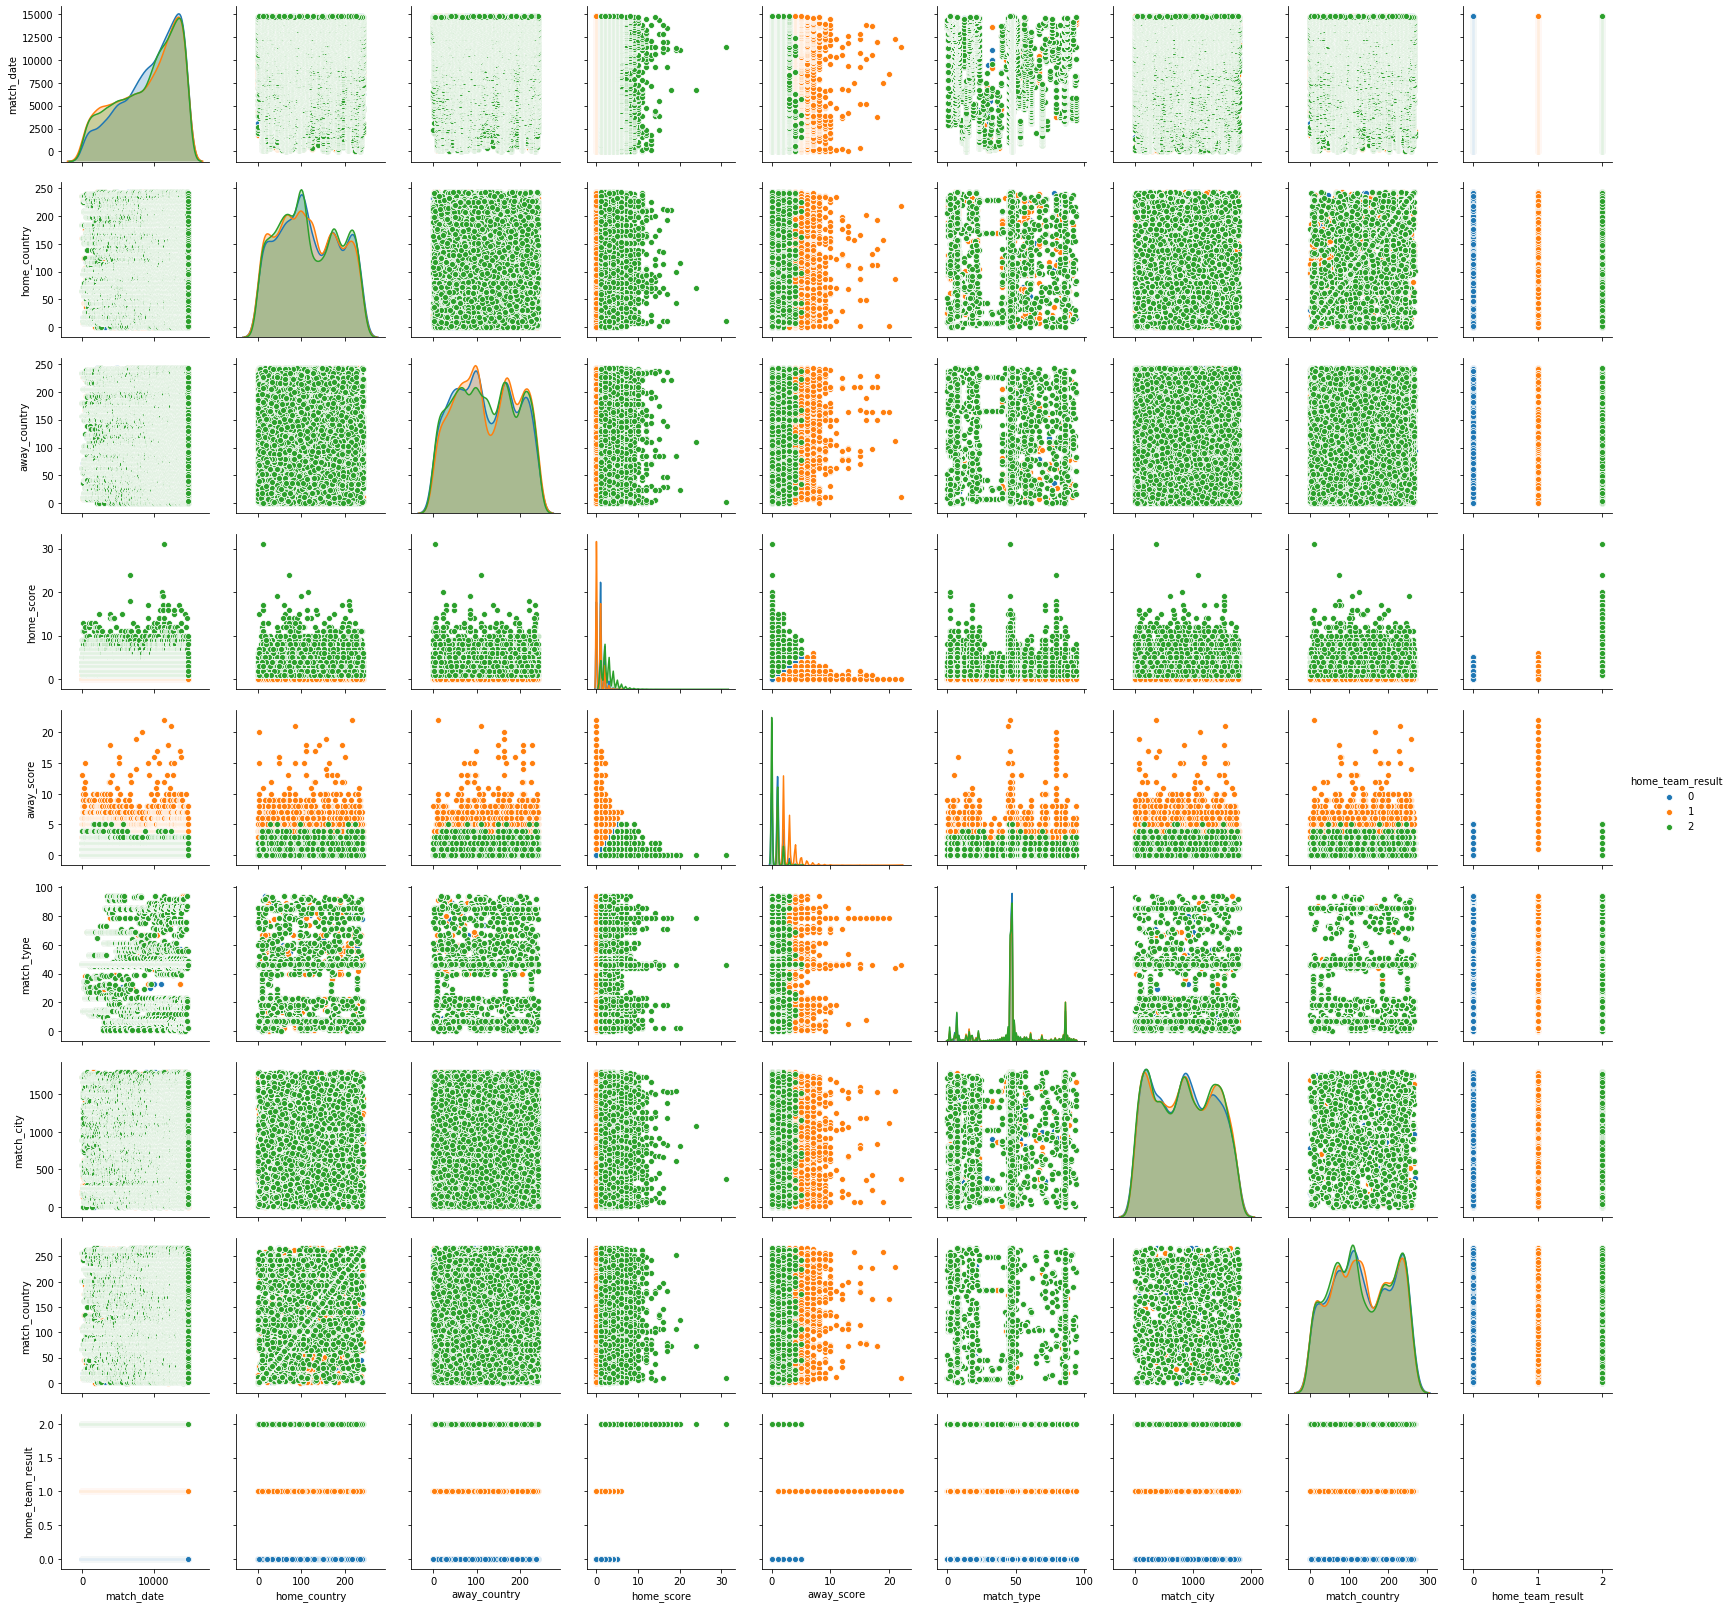

In [10]:
sns.pairplot(match, hue='home_team_result');

# Dropping less important columns according to heatmap

In [11]:
data=match.drop(columns=["away_country","match_type"]) #if you specify axis=1 you will be removing columns. #If you specify axis=0 you will be removing rows from dataset.
data

,match_date,home_country,home_score,away_score,match_city,match_country,home_team_result
0,0,184,0,0,559,201,0
1,1,65,4,2,890,68,2
2,2,184,2,1,559,201,2
3,3,65,2,2,890,68,0
4,4,184,3,0,559,201,2
...,...,...,...,...,...,...,...
38680,14738,19,1,0,250,19,2
38681,14738,79,2,2,370,85,0
38682,14738,218,1,1,393,236,0
38683,14739,11,3,1,1528,10,2


# Lets part the target values from the data

In [12]:
match_feature = data.iloc[:,:-1]
match_feature.head()

,match_date,home_country,home_score,away_score,match_city,match_country
0,0,184,0,0,559,201
1,1,65,4,2,890,68
2,2,184,2,1,559,201
3,3,65,2,2,890,68
4,4,184,3,0,559,201


In [13]:
match_label = data['home_team_result']
match_label.head()

0    0
1    2
2    2
3    0
4    2
Name: home_team_result, dtype: int32

# SPLITING DATA INTO TWO PARTS Training and Testing Data


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(match_feature,match_label,random_state=0,test_size =0.2)

# Using ML and DL alogorithms

## 1. KNN Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn= knn.fit(X_train,y_train)
y_pred1=knn.predict(X_test)
print("Prediction of test data:",y_pred1)

Prediction of test data: [1 2 2 ... 2 2 0]


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(knn,match_feature,match_label)
cross_val_score

array([0.28615743, 0.18534316, 0.33578907, 0.34367326, 0.23562104])

In [17]:
average_accuracy_KNN = statistics.mean(cross_val_score)
print("Average acurracy by KNN Classifier:",average_accuracy_KNN)

Average acurracy by KNN Classifier: 0.2773167894532765


## 2.RANDOM FOREST CLASSIFIER

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =40, random_state =0)
rf = rf.fit(X_train, y_train)
y_pred2=rf.predict(X_test)
print("Prediction of test data:",y_pred2)

Prediction of test data: [0 1 2 ... 0 0 0]


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(rf,match_feature,match_label)
cross_val_score

array([0.87773039, 0.99961225, 0.99987075, 0.99961225, 0.92594029])

In [20]:
average_accuracy_RF = statistics.mean(cross_val_score)
print("Average acurracy by Random Forest Classifier:",average_accuracy_RF)

Average acurracy by Random Forest Classifier: 0.9605531859894016


## 3.DECISION TREE CLASSIFIER

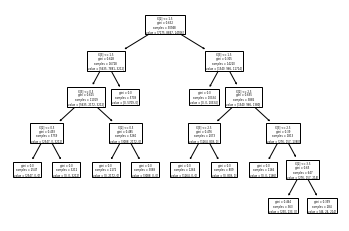

In [21]:
from sklearn.tree import DecisionTreeClassifier
tr= DecisionTreeClassifier(max_depth=5)
tr = tr.fit(X_train,y_train)
from sklearn import tree
tree.plot_tree(tr);

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(tr,match_feature,match_label)
cross_val_score

array([0.98177588, 0.99547628, 0.99831976, 0.99676877, 0.99612253])

In [23]:
average_accuracy_TR = statistics.mean(cross_val_score)
print("Average acurracy by Decision Tree Classifier:",average_accuracy_TR)

Average acurracy by Decision Tree Classifier: 0.9936926457283185


## 4.Neural network(DL)

In [24]:
from sklearn.neural_network import MLPClassifier
# Initializing the multilayer perceptron
# mlp = MLPClassifier(hidden_layer_sizes(10),solver='sgd',learning_rate_init= 0.01, max_iter=500)
mlp = MLPClassifier()
mlp= mlp.fit(X_train,y_train)
mlp

MLPClassifier()

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(mlp,match_feature,match_label)
cross_val_score

array([0.72754298, 0.92167507, 1.        , 0.76825643, 0.53237689])

In [26]:
average_accuracy_DL = statistics.mean(cross_val_score)
print("Average acurracy by Neural network:",average_accuracy_DL)

Average acurracy by Neural network: 0.7899702727155228


## Checking the Accuracy by different Algorithms

In [27]:
print("Average acurracy by KNN Classifier:",average_accuracy_KNN)
print("Average acurracy by Random Forest Classifier:",average_accuracy_RF)
print("Average acurracy by Decision Tree Classifier:",average_accuracy_TR)
print("Average acurracy by Neural network:",average_accuracy_DL)

Average acurracy by KNN Classifier: 0.2773167894532765
Average acurracy by Random Forest Classifier: 0.9605531859894016
Average acurracy by Decision Tree Classifier: 0.9936926457283185
Average acurracy by Neural network: 0.7899702727155228


## Going with high acurracy model & Testing the model(decision tree)

In [28]:
#Some examples
match_prediction=[[1,60,4,2,890,68]]#win
#match_prediction=[[6 ,65 ,1 ,3 ,890 ,68]]#lose
#match_prediction=[[3 ,65 ,2 ,2 ,890 ,68]]#draw

In [29]:
results=tr.predict(match_prediction)
for i in results:
    if results== 0:
        print("Match will be tough there may be Draw!")
    elif results==1: 
        print("Opponents are favourite they may win!")
    elif results==2:
        print("We are favourites we may win!")

We are favourites we may win!
